In [1]:
import torch
from matplotlib import pyplot as plt
import torch.nn.functional as F

FEATURE_PATH = "/pasteur/u/yuhuiz/mmdebug/src/pytorch_cache/coco_features_vitb32.pt"

features = torch.load(FEATURE_PATH)

# No normalization

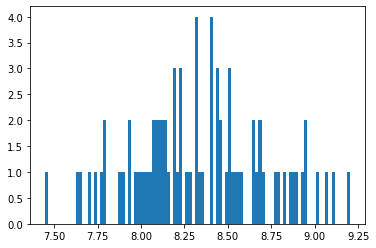

norm: 8.3357 +/- 0.3824


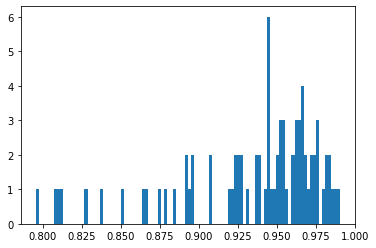

cosine similarity: 0.9340 +/- 0.0468


In [2]:
img_features, txt_features, labels = (
    torch.tensor(features["image_features"]),
    torch.tensor(features["text_features"]),
    torch.tensor(features["labels"]),
)

gaps = []
for i in range(len(labels[0])):
    idxs = [j for j in range(len(labels)) if labels[j][i] == 1]
    gap = img_features[idxs].mean(0) - txt_features[idxs].mean(0)
    gaps.append(gap)

gaps = torch.stack(gaps)

norms = gaps.norm(dim=-1)
plt.hist(norms.numpy(), bins=100)
plt.show()
print(f"norm: {norms.mean():.4f} +/- {norms.std():.4f}")

gap_directions = F.normalize(gaps)
mean_gap_direciton = F.normalize(gap_directions.mean(0), dim=-1)
cossims = gap_directions @ mean_gap_direciton
plt.hist(cossims.numpy(), bins=100)
plt.show()
print(f"cosine similarity: {cossims.mean():.4f} +/- {cossims.std():.4f}")

# Normalization

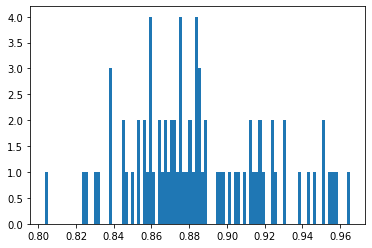

norm: 0.8853 +/- 0.0359


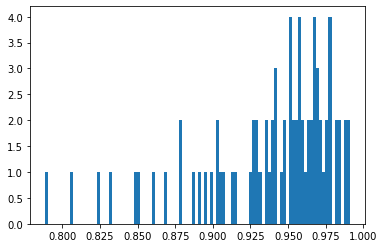

cosine similarity: 0.9377 +/- 0.0447


In [3]:
img_features, txt_features, labels = (
    F.normalize(torch.tensor(features["image_features"])),  # Difference here!!!
    F.normalize(torch.tensor(features["text_features"])),  # Difference here!!!
    torch.tensor(features["labels"]),
)

gaps = []
for i in range(len(labels[0])):
    idxs = [j for j in range(len(labels)) if labels[j][i] == 1]
    gap = img_features[idxs].mean(0) - txt_features[idxs].mean(0)
    gaps.append(gap)

gaps = torch.stack(gaps)

norms = gaps.norm(dim=-1)
plt.hist(norms.numpy(), bins=100)
plt.show()
print(f"norm: {norms.mean():.4f} +/- {norms.std():.4f}")

gap_directions = F.normalize(gaps)
mean_gap_direciton = F.normalize(gap_directions.mean(0), dim=-1)
cossims = gap_directions @ mean_gap_direciton
plt.hist(cossims.numpy(), bins=100)
plt.show()
print(f"cosine similarity: {cossims.mean():.4f} +/- {cossims.std():.4f}")

# Normalization + Renormalization

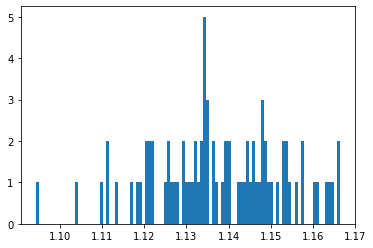

norm: 1.1376 +/- 0.0153


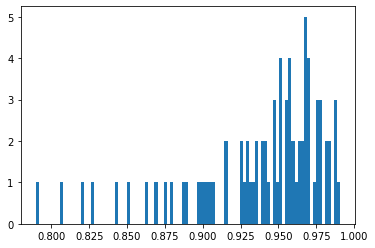

cosine similarity: 0.9375 +/- 0.0449


In [4]:
img_features, txt_features, labels = (
    F.normalize(torch.tensor(features["image_features"])),
    F.normalize(torch.tensor(features["text_features"])),
    torch.tensor(features["labels"]),
)

gaps = []
for i in range(len(labels[0])):
    idxs = [j for j in range(len(labels)) if labels[j][i] == 1]
    gap = F.normalize(img_features[idxs].mean(0), dim=0) - F.normalize(
        txt_features[idxs].mean(0), dim=0
    )  # Difference here!!!
    gaps.append(gap)

gaps = torch.stack(gaps)

norms = gaps.norm(dim=-1)
plt.hist(norms.numpy(), bins=100)
plt.show()
print(f"norm: {norms.mean():.4f} +/- {norms.std():.4f}")

gap_directions = F.normalize(gaps)
mean_gap_direciton = F.normalize(gap_directions.mean(0), dim=-1)
cossims = gap_directions @ mean_gap_direciton
plt.hist(cossims.numpy(), bins=100)
plt.show()
print(f"cosine similarity: {cossims.mean():.4f} +/- {cossims.std():.4f}")